# **Scraping Tweets with tweepy**

In [1]:
!pip3 install --user --q --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint 
!pip install yfinance --q

## !!! RESTART RUNTIME AFTER INSTALL ###

     |████████████████████████████████| 1.3MB 13.5MB/s 
     |████████████████████████████████| 266kB 51.9MB/s 
     |████████████████████████████████| 327kB 32.7MB/s 
     |████████████████████████████████| 296kB 45.0MB/s 
     |████████████████████████████████| 143kB 49.8MB/s 
     |████████████████████████████████| 235kB 47.4MB/s 
     |████████████████████████████████| 81kB 10.8MB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
     |████████████████████████████████| 5.5MB 16.9MB/s 


In [7]:
import twint 
import nest_asyncio 
nest_asyncio.apply()
import pandas as pd
c = twint.Config()
c.Search = "$NFLX OR Netflix, from:cnbc OR from:BreakoutStocks OR from:Stocktwits OR from:WSJ OR from:reuters OR from:forbes OR from:realDonaldTrump OR from:RobinJPowell OR from:WSJDealJournal OR from:Benzinga OR from:EventDrivenMgr OR from:SeekingALpha OR from:WSJmarkets OR from:Business OR from:tradingguru OR from:marketcurrents OR from:financialtimes OR from:elonmusk OR from:SpiegelPeter OR from:BillGates OR from:bespokeinvest"

c.Lang='en'

c.Since = "2019-11-15"
c.Until = "2020-11-15"
c.Store_json = True
c.Output = "NFLX_FinAcc_365_2.json"
#running search
twint.run.Search(c) 

1327661348835221504 2020-11-14 17:15:06 +0000 <WSJ> Netflix has 16 projects in the works from its Tokyo-based team as the pandemic lifts anime demand  https://t.co/2WUeeImJ3Q
1327465052702695425 2020-11-14 04:15:06 +0000 <WSJ> Review: In Netflix's "The Life Ahead," Sophia Loren plays a retired prostitute who takes in a street kid in this remake of "Madame Rosa"  https://t.co/KPcClgGRwJ
1327427301710188545 2020-11-14 01:45:05 +0000 <WSJ> In our streaming guide this week: "The Crown" returns on Netflix, with Princess Diana and Margaret Thatcher. Plus, a UFO documentary that may make you believe and some holiday classics.  https://t.co/0pq1FCrXMJ
1327390787865255937 2020-11-13 23:20:00 +0000 <Forbes> Twitter will invest $100 million in community-focused financial institutions, joining a handful of major tech companies including Netflix and PayPal to combat racial injustice and poverty  https://t.co/UHNrm6s6nK  https://t.co/0a8Sv9sewW
1327321581962604547 2020-11-13 18:45:00 +0000 <Benzinga

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [9]:
pd.set_option('display.max_colwidth', -1) # --> to see the whole tweet

Tweets_df = pd.read_json("NFLX_FinAcc_365_2.json", lines=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [10]:
print(Tweets_df.shape)
Tweets_df.head()

(1975, 36)


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1327661348835221504,1327661348835221504,2020-11-14 17:15:06+00:00,2020-11-14,17:15:06,0,3108351,wsj,The Wall Street Journal,,Netflix has 16 projects in the works from its Tokyo-based team as the pandemic lifts anime demand https://t.co/2WUeeImJ3Q,en,[],[https://on.wsj.com/36D8FAK],[],8,20,122,[],[],https://twitter.com/WSJ/status/1327661348835221504,False,,0,,,,,,,,[],,,,
1,1327465052702695425,1327465052702695424,2020-11-14 04:15:06+00:00,2020-11-14,04:15:06,0,3108351,wsj,The Wall Street Journal,,"Review: In Netflix's ""The Life Ahead,"" Sophia Loren plays a retired prostitute who takes in a street kid in this remake of ""Madame Rosa"" https://t.co/KPcClgGRwJ",en,[],[https://on.wsj.com/2UzYs2F],[],10,22,180,[],[],https://twitter.com/WSJ/status/1327465052702695425,False,,0,,,,,,,,[],,,,
2,1327427301710188545,1327427301710188544,2020-11-14 01:45:05+00:00,2020-11-14,01:45:05,0,3108351,wsj,The Wall Street Journal,,"In our streaming guide this week: ""The Crown"" returns on Netflix, with Princess Diana and Margaret Thatcher. Plus, a UFO documentary that may make you believe and some holiday classics. https://t.co/0pq1FCrXMJ",en,[],[https://on.wsj.com/2UorqSG],[],13,15,130,[],[],https://twitter.com/WSJ/status/1327427301710188545,False,,0,,,,,,,,[],,,,
3,1327390787865255937,1327390787865255936,2020-11-13 23:20:00+00:00,2020-11-13,23:20:00,0,91478624,forbes,Forbes,,"Twitter will invest $100 million in community-focused financial institutions, joining a handful of major tech companies including Netflix and PayPal to combat racial injustice and poverty https://t.co/UHNrm6s6nK https://t.co/0a8Sv9sewW",en,[],[https://www.forbes.com/sites/sarahhansen/2020/11/12/twitter-joins-netflix-and-paypal-with-commitment-to-invest-in-racial-equality/?utm_source=twitter_video&utm_medium=social&utm_campaign=forbes],[],9,36,89,[],[],https://twitter.com/Forbes/status/1327390787865255937,False,,1,https://pbs.twimg.com/media/EmuQNy4W8AAu2A7.jpg,,,,,,,[],,,,
4,1327321581962604547,1327321581962604544,2020-11-13 18:45:00+00:00,2020-11-13,18:45:00,0,44060322,benzinga,Benzinga,,Walt Disney Analysts Bullish As Disney+ Gains Ground On Netflix $DIS $NFLX https://t.co/2ImPMGP4kn,en,[],[https://benzinga.com/z/18363274#.X67HWnxKkjs.twitter],[],1,1,7,[],"[dis, nflx]",https://twitter.com/Benzinga/status/1327321581962604547,False,,0,,,,,,,,[],,,,


In [11]:
Tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1975 entries, 0 to 1974
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   id               1975 non-null   int64              
 1   conversation_id  1975 non-null   int64              
 2   created_at       1975 non-null   datetime64[ns, UTC]
 3   date             1975 non-null   datetime64[ns]     
 4   time             1975 non-null   object             
 5   timezone         1975 non-null   int64              
 6   user_id          1975 non-null   int64              
 7   username         1975 non-null   object             
 8   name             1975 non-null   object             
 9   place            1975 non-null   object             
 10  tweet            1975 non-null   object             
 11  language         1975 non-null   object             
 12  mentions         1975 non-null   object             
 13  urls             1

In [12]:
### Clean the Data Frame, so we only have the columns we need

# Only keep id, date, user_id, username, name, tweet, language, hashtags, cashtags

Tweets_df = Tweets_df.iloc[:, [0, 3, 6, 7, 8, 10, 11, 18, 19]]

print(Tweets_df.shape)
Tweets_df.head()


(1975, 9)


,id,date,user_id,username,name,tweet,language,hashtags,cashtags
0,1327661348835221504,2020-11-14,3108351,wsj,The Wall Street Journal,Netflix has 16 projects in the works from its Tokyo-based team as the pandemic lifts anime demand https://t.co/2WUeeImJ3Q,en,[],[]
1,1327465052702695425,2020-11-14,3108351,wsj,The Wall Street Journal,"Review: In Netflix's ""The Life Ahead,"" Sophia Loren plays a retired prostitute who takes in a street kid in this remake of ""Madame Rosa"" https://t.co/KPcClgGRwJ",en,[],[]
2,1327427301710188545,2020-11-14,3108351,wsj,The Wall Street Journal,"In our streaming guide this week: ""The Crown"" returns on Netflix, with Princess Diana and Margaret Thatcher. Plus, a UFO documentary that may make you believe and some holiday classics. https://t.co/0pq1FCrXMJ",en,[],[]
3,1327390787865255937,2020-11-13,91478624,forbes,Forbes,"Twitter will invest $100 million in community-focused financial institutions, joining a handful of major tech companies including Netflix and PayPal to combat racial injustice and poverty https://t.co/UHNrm6s6nK https://t.co/0a8Sv9sewW",en,[],[]
4,1327321581962604547,2020-11-13,44060322,benzinga,Benzinga,Walt Disney Analysts Bullish As Disney+ Gains Ground On Netflix $DIS $NFLX https://t.co/2ImPMGP4kn,en,[],"[dis, nflx]"


#**Tweet Preprocessing**

In [13]:
### Remove all observations which are not classified as language 'en'

Tweets_df = Tweets_df[Tweets_df.language == "en"]

print(Tweets_df.shape)
#Tweets_df

(1970, 9)


In [14]:
### Remove all tweets observations which contain "Amazon river"

#Tweets_df.loc[Tweets_df["tweet"].str.contains("Amazon river", case=False), "tweet"] = float('nan')
#Tweets_df=Tweets_df.dropna(subset=["tweet"])

#print(Tweets_df.shape)

### NOTE: REMOVE THAT FOR THE OTHER STOCKS !!!

In [15]:
!pip install tweet-preprocessor

#removing URLS, smileys, reserved words, mentions, hashtag etc.

import preprocessor as p
p.set_options(p.OPT.URL, p.OPT.EMOJI, p.OPT.RESERVED, p.OPT.MENTION, p.OPT.HASHTAG)
Tweets_df["reworkedtweet"] = [p.clean(tweet) for tweet in Tweets_df['tweet']]

print(Tweets_df.shape)
Tweets_df

(1970, 10)


,id,date,user_id,username,name,tweet,language,hashtags,cashtags,reworkedtweet
0,1327661348835221504,2020-11-14,3108351,wsj,The Wall Street Journal,Netflix has 16 projects in the works from its Tokyo-based team as the pandemic lifts anime demand https://t.co/2WUeeImJ3Q,en,[],[],Netflix has 16 projects in the works from its Tokyo-based team as the pandemic lifts anime demand
1,1327465052702695425,2020-11-14,3108351,wsj,The Wall Street Journal,"Review: In Netflix's ""The Life Ahead,"" Sophia Loren plays a retired prostitute who takes in a street kid in this remake of ""Madame Rosa"" https://t.co/KPcClgGRwJ",en,[],[],"Review: In Netflix's ""The Life Ahead,"" Sophia Loren plays a retired prostitute who takes in a street kid in this remake of ""Madame Rosa"""
2,1327427301710188545,2020-11-14,3108351,wsj,The Wall Street Journal,"In our streaming guide this week: ""The Crown"" returns on Netflix, with Princess Diana and Margaret Thatcher. Plus, a UFO documentary that may make you believe and some holiday classics. https://t.co/0pq1FCrXMJ",en,[],[],"In our streaming guide this week: ""The Crown"" returns on Netflix, with Princess Diana and Margaret Thatcher. Plus, a UFO documentary that may make you believe and some holiday classics."
3,1327390787865255937,2020-11-13,91478624,forbes,Forbes,"Twitter will invest $100 million in community-focused financial institutions, joining a handful of major tech companies including Netflix and PayPal to combat racial injustice and poverty https://t.co/UHNrm6s6nK https://t.co/0a8Sv9sewW",en,[],[],"Twitter will invest $100 million in community-focused financial institutions, joining a handful of major tech companies including Netflix and PayPal to combat racial injustice and poverty"
4,1327321581962604547,2020-11-13,44060322,benzinga,Benzinga,Walt Disney Analysts Bullish As Disney+ Gains Ground On Netflix $DIS $NFLX https://t.co/2ImPMGP4kn,en,[],"[dis, nflx]",Walt Disney Analysts Bullish As Disney+ Gains Ground On Netflix $DIS $NFLX
...,...,...,...,...,...,...,...,...,...,...
1970,1195335584547360771,2019-11-15,15296897,marketcurrents,Breaking News,$NFLX - Netflix eyes all-original content future https://t.co/bNOLFJbAML,en,[],[nflx],$NFLX - Netflix eyes all-original content future
1971,1195200682363621376,2019-11-15,34713362,business,Bloomberg,U.S. hedge funds bought shares of Facebook and Netflix despite steep declines in the technology darlings during a volatile third quarter https://t.co/radNOk4A3y https://t.co/W4TUlEUZeV,en,[],[],U.S. hedge funds bought shares of Facebook and Netflix despite steep declines in the technology darlings during a volatile third quarter
1972,1195148157765730307,2019-11-15,44060322,benzinga,Benzinga,"Mark Cuban Talks Artificial Intelligence, Disney Vs. Netflix $DIS $NFLX $WMT https://t.co/BTvS6NnIr9",en,[],"[dis, nflx, wmt]","Mark Cuban Talks Artificial Intelligence, Disney Vs. Netflix $DIS $NFLX $WMT"
1973,1195146129224146945,2019-11-15,34713362,business,Bloomberg,T-Series beat PewDiePie to become the world’s most popular YouTube channel. Surviving Netflix will be tougher https://t.co/loBSYTE7C7 via @BW,en,[],[],T-Series beat PewDiePie to become the worlds most popular YouTube channel. Surviving Netflix will be tougher via


In [16]:
import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import string
nltk.download("stopwords")
stopwords = stopwords.words("english")
ps= nltk.PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
#remove cashtags 
Tweets_df["reworkedtweet"]= Tweets_df["reworkedtweet"].str.replace("[$]+[a-zA-Z]+","") 
#Tweets_df

In [18]:
#removing punctuation
Tweets_df["reworkedtweet"]= Tweets_df["reworkedtweet"].str.replace("[^a-zA-Z0–9]", " ")

In [19]:
#Removing more than 2 consectuvie letters(like aaaaaaaaaaa) or Finaaaaaly to Finaaly
def reduce_lengthening(text):
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1", text)
Tweets_df['reworkedtweet']= Tweets_df['reworkedtweet'].apply (lambda x: reduce_lengthening(x))

In [20]:
#Tokenization 
def tokenize(text):
  tokens = re.split("\W+", text)
  return tokens
Tweets_df['reworkedtweet']= Tweets_df['reworkedtweet'].apply (lambda x: tokenize(x.lower()))

In [21]:
#removing numbers
Tweets_df['reworkedtweet'] = Tweets_df['reworkedtweet'].apply(lambda list_data: [x for x in list_data if x.isalpha()])

In [22]:
## From NLTK library 

# We actually used the stopword library (english) of NLTK, but we manually
# adjuted the stopword list and removed "up" and "down" since those two
# stopwords are relevant for the stock price analysis

stopwords =['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [23]:
#removing stopwords       ### --> Take the one from WS --> DONE
def remove_stopword(text):
  text_nostopword= [char for char in text if char not in stopwords]
  return text_nostopword
Tweets_df["reworkedtweet"]= Tweets_df["reworkedtweet"].apply(lambda x: remove_stopword(x))

In [24]:
### Drop empty rows (--> If for example an observation only contained Cashtags in the tweet, the tweet would be empty and we therefore remove it???)
Tweets_df["reworkedtweet_2"] = Tweets_df["reworkedtweet"]
Tweets_df["reworkedtweet_2"] = Tweets_df[Tweets_df['reworkedtweet_2'].map(lambda d: len(d)) > 0]
Tweets_df=Tweets_df.dropna(subset=["reworkedtweet_2"])
Tweets_df=Tweets_df.drop(columns=["reworkedtweet_2"])

print(Tweets_df.shape)

(1969, 10)


In [25]:
#Stemming
def stem(tweet_no_stopword):
  text = [ps.stem ( word) for word in tweet_no_stopword]
  return text
Tweets_df["reworkedtweet"]= Tweets_df["reworkedtweet"].apply(lambda x: stem(x))

#Note: Check how the prediction performs without the stemming, since the professors mentioned that it can go both was --> Could imrpove or worsen the NLP

In [26]:
Tweets_df.to_csv("tweets_processed.csv")
tweets_processed = pd.read_csv("tweets_processed.csv", lineterminator='\n')
tweets_processed = tweets_processed.drop(columns=["Unnamed: 0"])

print(tweets_processed.shape)
tweets_processed

### After all the Pre-Processing it seems like we still keep the "http" of the URLs for some reason --> CHECKED --> Now they are all removed!

(1969, 10)


,id,date,user_id,username,name,tweet,language,hashtags,cashtags,reworkedtweet
0,1327661348835221504,2020-11-14,3108351,wsj,The Wall Street Journal,Netflix has 16 projects in the works from its Tokyo-based team as the pandemic lifts anime demand https://t.co/2WUeeImJ3Q,en,[],[],"['netflix', 'project', 'work', 'tokyo', 'base', 'team', 'pandem', 'lift', 'anim', 'demand']"
1,1327465052702695425,2020-11-14,3108351,wsj,The Wall Street Journal,"Review: In Netflix's ""The Life Ahead,"" Sophia Loren plays a retired prostitute who takes in a street kid in this remake of ""Madame Rosa"" https://t.co/KPcClgGRwJ",en,[],[],"['review', 'netflix', 'life', 'ahead', 'sophia', 'loren', 'play', 'retir', 'prostitut', 'take', 'street', 'kid', 'remak', 'madam', 'rosa']"
2,1327427301710188545,2020-11-14,3108351,wsj,The Wall Street Journal,"In our streaming guide this week: ""The Crown"" returns on Netflix, with Princess Diana and Margaret Thatcher. Plus, a UFO documentary that may make you believe and some holiday classics. https://t.co/0pq1FCrXMJ",en,[],[],"['stream', 'guid', 'week', 'crown', 'return', 'netflix', 'princess', 'diana', 'margaret', 'thatcher', 'plu', 'ufo', 'documentari', 'may', 'make', 'believ', 'holiday', 'classic']"
3,1327390787865255937,2020-11-13,91478624,forbes,Forbes,"Twitter will invest $100 million in community-focused financial institutions, joining a handful of major tech companies including Netflix and PayPal to combat racial injustice and poverty https://t.co/UHNrm6s6nK https://t.co/0a8Sv9sewW",en,[],[],"['twitter', 'invest', 'million', 'commun', 'focus', 'financi', 'institut', 'join', 'hand', 'major', 'tech', 'compani', 'includ', 'netflix', 'paypal', 'combat', 'racial', 'injustic', 'poverti']"
4,1327321581962604547,2020-11-13,44060322,benzinga,Benzinga,Walt Disney Analysts Bullish As Disney+ Gains Ground On Netflix $DIS $NFLX https://t.co/2ImPMGP4kn,en,[],"['dis', 'nflx']","['walt', 'disney', 'analyst', 'bullish', 'disney', 'gain', 'ground', 'netflix']"
...,...,...,...,...,...,...,...,...,...,...
1964,1195335584547360771,2019-11-15,15296897,marketcurrents,Breaking News,$NFLX - Netflix eyes all-original content future https://t.co/bNOLFJbAML,en,[],['nflx'],"['netflix', 'eye', 'origin', 'content', 'futur']"
1965,1195200682363621376,2019-11-15,34713362,business,Bloomberg,U.S. hedge funds bought shares of Facebook and Netflix despite steep declines in the technology darlings during a volatile third quarter https://t.co/radNOk4A3y https://t.co/W4TUlEUZeV,en,[],[],"['u', 'hedg', 'fund', 'bought', 'share', 'facebook', 'netflix', 'despit', 'steep', 'declin', 'technolog', 'darl', 'volatil', 'third', 'quarter']"
1966,1195148157765730307,2019-11-15,44060322,benzinga,Benzinga,"Mark Cuban Talks Artificial Intelligence, Disney Vs. Netflix $DIS $NFLX $WMT https://t.co/BTvS6NnIr9",en,[],"['dis', 'nflx', 'wmt']","['mark', 'cuban', 'talk', 'artifici', 'intellig', 'disney', 'vs', 'netflix']"
1967,1195146129224146945,2019-11-15,34713362,business,Bloomberg,T-Series beat PewDiePie to become the world’s most popular YouTube channel. Surviving Netflix will be tougher https://t.co/loBSYTE7C7 via @BW,en,[],[],"['seri', 'beat', 'pewdiepi', 'becom', 'world', 'popular', 'youtub', 'channel', 'surviv', 'netflix', 'tougher', 'via']"


# **VADER - Sentiment Analysis** 

In [27]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 12.1MB/s 


In [28]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [29]:
# Reset index taht VADER doesn't miss last few observations

Tweets_df = Tweets_df.reset_index()
Tweets_df = Tweets_df.drop(columns=["index"])

# Get Sentiment after pre-processing

Tweets_df['neg'] = tweets_processed["reworkedtweet"].apply(lambda x:analyser.polarity_scores(x)['neg'])
Tweets_df['neu'] = tweets_processed["reworkedtweet"].apply(lambda x:analyser.polarity_scores(x)['neu'])
Tweets_df['pos'] = tweets_processed["reworkedtweet"].apply(lambda x:analyser.polarity_scores(x)['pos'])
Tweets_df['compound'] = tweets_processed["reworkedtweet"].apply(lambda x:analyser.polarity_scores(x)['compound'])

Tweets_df

,id,date,user_id,username,name,tweet,language,hashtags,cashtags,reworkedtweet,neg,neu,pos,compound
0,1327661348835221504,2020-11-14,3108351,wsj,The Wall Street Journal,Netflix has 16 projects in the works from its Tokyo-based team as the pandemic lifts anime demand https://t.co/2WUeeImJ3Q,en,[],[],"[netflix, project, work, tokyo, base, team, pandem, lift, anim, demand]",0.143,0.857,0.000,-0.1280
1,1327465052702695425,2020-11-14,3108351,wsj,The Wall Street Journal,"Review: In Netflix's ""The Life Ahead,"" Sophia Loren plays a retired prostitute who takes in a street kid in this remake of ""Madame Rosa"" https://t.co/KPcClgGRwJ",en,[],[],"[review, netflix, life, ahead, sophia, loren, play, retir, prostitut, take, street, kid, remak, madam, rosa]",0.000,0.854,0.146,0.3400
2,1327427301710188545,2020-11-14,3108351,wsj,The Wall Street Journal,"In our streaming guide this week: ""The Crown"" returns on Netflix, with Princess Diana and Margaret Thatcher. Plus, a UFO documentary that may make you believe and some holiday classics. https://t.co/0pq1FCrXMJ",en,[],[],"[stream, guid, week, crown, return, netflix, princess, diana, margaret, thatcher, plu, ufo, documentari, may, make, believ, holiday, classic]",0.000,0.863,0.137,0.4019
3,1327390787865255937,2020-11-13,91478624,forbes,Forbes,"Twitter will invest $100 million in community-focused financial institutions, joining a handful of major tech companies including Netflix and PayPal to combat racial injustice and poverty https://t.co/UHNrm6s6nK https://t.co/0a8Sv9sewW",en,[],[],"[twitter, invest, million, commun, focus, financi, institut, join, hand, major, tech, compani, includ, netflix, paypal, combat, racial, injustic, poverti]",0.101,0.672,0.227,0.4588
4,1327321581962604547,2020-11-13,44060322,benzinga,Benzinga,Walt Disney Analysts Bullish As Disney+ Gains Ground On Netflix $DIS $NFLX https://t.co/2ImPMGP4kn,en,[],"[dis, nflx]","[walt, disney, analyst, bullish, disney, gain, ground, netflix]",0.000,0.673,0.327,0.5267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,1195335584547360771,2019-11-15,15296897,marketcurrents,Breaking News,$NFLX - Netflix eyes all-original content future https://t.co/bNOLFJbAML,en,[],[nflx],"[netflix, eye, origin, content, futur]",0.000,1.000,0.000,0.0000
1965,1195200682363621376,2019-11-15,34713362,business,Bloomberg,U.S. hedge funds bought shares of Facebook and Netflix despite steep declines in the technology darlings during a volatile third quarter https://t.co/radNOk4A3y https://t.co/W4TUlEUZeV,en,[],[],"[u, hedg, fund, bought, share, facebook, netflix, despit, steep, declin, technolog, darl, volatil, third, quarter]",0.000,0.864,0.136,0.2960
1966,1195148157765730307,2019-11-15,44060322,benzinga,Benzinga,"Mark Cuban Talks Artificial Intelligence, Disney Vs. Netflix $DIS $NFLX $WMT https://t.co/BTvS6NnIr9",en,[],"[dis, nflx, wmt]","[mark, cuban, talk, artifici, intellig, disney, vs, netflix]",0.000,1.000,0.000,0.0000
1967,1195146129224146945,2019-11-15,34713362,business,Bloomberg,T-Series beat PewDiePie to become the world’s most popular YouTube channel. Surviving Netflix will be tougher https://t.co/loBSYTE7C7 via @BW,en,[],[],"[seri, beat, pewdiepi, becom, world, popular, youtub, channel, surviv, netflix, tougher, via]",0.000,0.690,0.310,0.5423


In [30]:
##Defining classes
def analyse_sentiment(compound):
    if compound > 0:
        return "Positive_VADER"
    if compound == 0:
        return "Neutral_VADER"
    if compound < 0:
        return "Negative_VADER"

# Apply the funtion on Polarity column and add the results into a new column
Tweets_df["class_VADER"] = Tweets_df["compound"].apply(analyse_sentiment)

print(Tweets_df.shape)
Tweets_df

(1969, 15)


,id,date,user_id,username,name,tweet,language,hashtags,cashtags,reworkedtweet,neg,neu,pos,compound,class_VADER
0,1327661348835221504,2020-11-14,3108351,wsj,The Wall Street Journal,Netflix has 16 projects in the works from its Tokyo-based team as the pandemic lifts anime demand https://t.co/2WUeeImJ3Q,en,[],[],"[netflix, project, work, tokyo, base, team, pandem, lift, anim, demand]",0.143,0.857,0.000,-0.1280,Negative_VADER
1,1327465052702695425,2020-11-14,3108351,wsj,The Wall Street Journal,"Review: In Netflix's ""The Life Ahead,"" Sophia Loren plays a retired prostitute who takes in a street kid in this remake of ""Madame Rosa"" https://t.co/KPcClgGRwJ",en,[],[],"[review, netflix, life, ahead, sophia, loren, play, retir, prostitut, take, street, kid, remak, madam, rosa]",0.000,0.854,0.146,0.3400,Positive_VADER
2,1327427301710188545,2020-11-14,3108351,wsj,The Wall Street Journal,"In our streaming guide this week: ""The Crown"" returns on Netflix, with Princess Diana and Margaret Thatcher. Plus, a UFO documentary that may make you believe and some holiday classics. https://t.co/0pq1FCrXMJ",en,[],[],"[stream, guid, week, crown, return, netflix, princess, diana, margaret, thatcher, plu, ufo, documentari, may, make, believ, holiday, classic]",0.000,0.863,0.137,0.4019,Positive_VADER
3,1327390787865255937,2020-11-13,91478624,forbes,Forbes,"Twitter will invest $100 million in community-focused financial institutions, joining a handful of major tech companies including Netflix and PayPal to combat racial injustice and poverty https://t.co/UHNrm6s6nK https://t.co/0a8Sv9sewW",en,[],[],"[twitter, invest, million, commun, focus, financi, institut, join, hand, major, tech, compani, includ, netflix, paypal, combat, racial, injustic, poverti]",0.101,0.672,0.227,0.4588,Positive_VADER
4,1327321581962604547,2020-11-13,44060322,benzinga,Benzinga,Walt Disney Analysts Bullish As Disney+ Gains Ground On Netflix $DIS $NFLX https://t.co/2ImPMGP4kn,en,[],"[dis, nflx]","[walt, disney, analyst, bullish, disney, gain, ground, netflix]",0.000,0.673,0.327,0.5267,Positive_VADER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,1195335584547360771,2019-11-15,15296897,marketcurrents,Breaking News,$NFLX - Netflix eyes all-original content future https://t.co/bNOLFJbAML,en,[],[nflx],"[netflix, eye, origin, content, futur]",0.000,1.000,0.000,0.0000,Neutral_VADER
1965,1195200682363621376,2019-11-15,34713362,business,Bloomberg,U.S. hedge funds bought shares of Facebook and Netflix despite steep declines in the technology darlings during a volatile third quarter https://t.co/radNOk4A3y https://t.co/W4TUlEUZeV,en,[],[],"[u, hedg, fund, bought, share, facebook, netflix, despit, steep, declin, technolog, darl, volatil, third, quarter]",0.000,0.864,0.136,0.2960,Positive_VADER
1966,1195148157765730307,2019-11-15,44060322,benzinga,Benzinga,"Mark Cuban Talks Artificial Intelligence, Disney Vs. Netflix $DIS $NFLX $WMT https://t.co/BTvS6NnIr9",en,[],"[dis, nflx, wmt]","[mark, cuban, talk, artifici, intellig, disney, vs, netflix]",0.000,1.000,0.000,0.0000,Neutral_VADER
1967,1195146129224146945,2019-11-15,34713362,business,Bloomberg,T-Series beat PewDiePie to become the world’s most popular YouTube channel. Surviving Netflix will be tougher https://t.co/loBSYTE7C7 via @BW,en,[],[],"[seri, beat, pewdiepi, becom, world, popular, youtub, channel, surviv, netflix, tougher, via]",0.000,0.690,0.310,0.5423,Positive_VADER


In [31]:
###Number of each class per day
dummies_VADER = pd.get_dummies(Tweets_df["class_VADER"])
Tweets_df = pd.concat([Tweets_df,dummies_VADER],axis=1)
nrclass_VADER=Tweets_df[["date", "Negative_VADER","Neutral_VADER", "Positive_VADER"]].groupby(by="date").sum().reset_index()

#Shifting one day forward 
nrclass_VADER["Negative_VADER"]=nrclass_VADER["Negative_VADER"].shift(1)
nrclass_VADER["Neutral_VADER"]=nrclass_VADER["Neutral_VADER"].shift(1)
nrclass_VADER["Positive_VADER"]=nrclass_VADER["Positive_VADER"].shift(1)

nrclass_VADER


,date,Negative_VADER,Neutral_VADER,Positive_VADER
0,2019-11-15,NaN,NaN,NaN
1,2019-11-16,0.0,3.0,6.0
2,2019-11-17,0.0,1.0,3.0
3,2019-11-18,1.0,1.0,1.0
4,2019-11-19,0.0,3.0,2.0
...,...,...,...,...
344,2020-11-10,0.0,2.0,1.0
345,2020-11-11,2.0,4.0,4.0
346,2020-11-12,3.0,1.0,1.0
347,2020-11-13,0.0,1.0,2.0


In [32]:
### DOUBLE CHECK if we have any NaN in the sentiment

Tweets_df["neg"].isna().sum() 

0

In [33]:
nrclass_VADER.sum()

Negative_VADER    465.0
Neutral_VADER     692.0
Positive_VADER    809.0
dtype: float64

# **Getting Yahoo data**

In [34]:
import yfinance as yf

NFLX = yf.Ticker("NFLX")

# get historical market data
hist = pd.DataFrame(NFLX.history(start="2019-11-15",end="2020-11-15"))


print(hist.shape)
hist

(252, 7)


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-11-15,290.589996,295.820007,287.570007,295.029999,6333800,0,0
2019-11-18,296.000000,304.989990,293.279999,302.570007,8616600,0,0
2019-11-19,304.010010,305.670013,298.519989,302.600006,5918000,0,0
2019-11-20,301.010010,308.250000,301.000000,305.160004,5111800,0,0
2019-11-21,306.000000,312.690002,304.260010,311.690002,7488400,0,0
...,...,...,...,...,...,...,...
2020-11-09,485.540009,495.850006,467.260010,470.500000,10419700,0,0
2020-11-10,470.950012,484.600006,463.410004,480.239990,8306100,0,0
2020-11-11,483.000000,491.679993,478.260010,490.760010,5460500,0,0


In [35]:
hist.Close

Date
2019-11-15    295.029999
2019-11-18    302.570007
2019-11-19    302.600006
2019-11-20    305.160004
2019-11-21    311.690002
                 ...    
2020-11-09    470.500000
2020-11-10    480.239990
2020-11-11    490.760010
2020-11-12    486.769989
2020-11-13    482.839996
Name: Close, Length: 252, dtype: float64

In [36]:
##Calculate returns
hist["returns"]=hist["Close"]/hist["Close"].shift(1)-1

##Get class
def analyse_returns(returns):
    if returns >= 0:
        return "1"
    else: 
      return "0"

# Apply the function on return column and add the results into a new column
hist["Return"] = hist["returns"].apply(analyse_returns)

histdata = hist         ### Note: Check that, that was added for the Trading Strategy I think


print(hist.shape)
hist

(252, 9)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,returns,Return
Date,,,,,,,,,
2019-11-15,290.589996,295.820007,287.570007,295.029999,6333800,0,0,NaN,0
2019-11-18,296.000000,304.989990,293.279999,302.570007,8616600,0,0,0.025557,1
2019-11-19,304.010010,305.670013,298.519989,302.600006,5918000,0,0,0.000099,1
2019-11-20,301.010010,308.250000,301.000000,305.160004,5111800,0,0,0.008460,1
2019-11-21,306.000000,312.690002,304.260010,311.690002,7488400,0,0,0.021399,1
...,...,...,...,...,...,...,...,...,...
2020-11-09,485.540009,495.850006,467.260010,470.500000,10419700,0,0,-0.085929,0
2020-11-10,470.950012,484.600006,463.410004,480.239990,8306100,0,0,0.020701,1
2020-11-11,483.000000,491.679993,478.260010,490.760010,5460500,0,0,0.021906,1


In [37]:
## Dropping unnecessary columns
hist = hist.drop(columns=["Open","High","Low","Close","Volume","Dividends", "Stock Splits","returns"])

print(hist.shape)
hist

(252, 1)


,Return
Date,
2019-11-15,0
2019-11-18,1
2019-11-19,1
2019-11-20,1
2019-11-21,1
...,...
2020-11-09,0
2020-11-10,1
2020-11-11,1


In [ ]:
#print(hist.dropna().shape)

#hist.dropna()  --> There is no more NaN at this point, since we already classified original returns >= 0 as Positive (or equal to 1) ... 
#BUT it's fine since we merge with Sentiment anyway and there we can drop NaN because of shift

In [38]:
hist.Return.value_counts(normalize=True)

1    0.507937
0    0.492063
Name: Return, dtype: float64

In [39]:
hist.Return.value_counts()

1    128
0    124
Name: Return, dtype: int64

# **Supervised Machine Learning - SML**

## **Doing SML on 3 sentiment classes(3 explanatory variable)**

### Merge the Datasets

In [40]:
###Merge
merged3sentiment = nrclass_VADER.merge(hist, left_on="date", right_on="Date")

print(merged3sentiment.shape)
merged3sentiment

# We have NaN in the first row --> So we drop(0) / dropna() in the next step

(249, 5)


,date,Negative_VADER,Neutral_VADER,Positive_VADER,Return
0,2019-11-15,NaN,NaN,NaN,0
1,2019-11-18,1.0,1.0,1.0,1
2,2019-11-19,0.0,3.0,2.0,1
3,2019-11-20,1.0,4.0,2.0,1
4,2019-11-21,2.0,3.0,1.0,1
...,...,...,...,...,...
244,2020-11-09,0.0,1.0,2.0,0
245,2020-11-10,0.0,2.0,1.0,1
246,2020-11-11,2.0,4.0,4.0,1
247,2020-11-12,3.0,1.0,1.0,0


In [41]:
merged3sentiment = merged3sentiment.dropna()  ### --> Drops by NaN  (but same result as code below)

print(merged3sentiment.shape)
merged3sentiment

(248, 5)


,date,Negative_VADER,Neutral_VADER,Positive_VADER,Return
1,2019-11-18,1.0,1.0,1.0,1
2,2019-11-19,0.0,3.0,2.0,1
3,2019-11-20,1.0,4.0,2.0,1
4,2019-11-21,2.0,3.0,1.0,1
5,2019-11-22,3.0,1.0,2.0,0
...,...,...,...,...,...
244,2020-11-09,0.0,1.0,2.0,0
245,2020-11-10,0.0,2.0,1.0,1
246,2020-11-11,2.0,4.0,4.0,1
247,2020-11-12,3.0,1.0,1.0,0


In [42]:
#merged3sentiment = merged3sentiment.drop(0)  ### --> Drobs by index 0 (I guess)   (but same result as code above)

#print(merged3sentiment.shape)
#merged3sentiment

In [43]:
print(merged3sentiment.shape)
merged3sentiment.head(20)

(248, 5)


,date,Negative_VADER,Neutral_VADER,Positive_VADER,Return
1,2019-11-18,1.0,1.0,1.0,1
2,2019-11-19,0.0,3.0,2.0,1
3,2019-11-20,1.0,4.0,2.0,1
4,2019-11-21,2.0,3.0,1.0,1
5,2019-11-22,3.0,1.0,2.0,0
6,2019-11-25,0.0,0.0,3.0,1
7,2019-11-26,1.0,3.0,2.0,0
8,2019-11-27,0.0,3.0,0.0,1
9,2019-11-29,0.0,3.0,1.0,0
10,2019-12-02,0.0,0.0,1.0,0


### Train Test Split 

In [44]:
from sklearn import preprocessing
#import numpy as np

le = preprocessing.LabelEncoder().fit(merged3sentiment["Return"])

print(merged3sentiment["Return"].to_numpy())    #   = original target column ["Return"] --> Note that the realizations are given in apostrophe 

print(le.classes_)

y = le.transform(merged3sentiment["Return"])


print(y)

['1' '1' '1' '1' '0' '1' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0'
 '1' '1' '1' '1' '1' '1' '0' '1' '0' '0' '0' '1' '1' '0' '1' '0' '1' '0'
 '0' '1' '0' '1' '0' '1' '0' '0' '1' '1' '0' '1' '0' '1' '0' '1' '1' '1'
 '0' '0' '1' '1' '1' '1' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0'
 '1' '0' '0' '0' '1' '0' '0' '1' '0' '1' '0' '1' '1' '1' '0' '0' '1' '0'
 '1' '1' '1' '0' '1' '0' '0' '0' '1' '1' '1' '1' '0' '1' '0' '0' '1' '0'
 '0' '0' '1' '1' '0' '1' '0' '1' '1' '0' '1' '0' '1' '1' '1' '0' '0' '0'
 '0' '0' '0' '1' '0' '1' '1' '1' '0' '0' '0' '1' '1' '0' '0' '1' '1' '1'
 '1' '1' '1' '0' '0' '1' '0' '1' '1' '1' '0' '1' '0' '1' '1' '1' '0' '0'
 '0' '1' '0' '1' '0' '0' '0' '1' '1' '0' '0' '1' '1' '1' '1' '0' '1' '0'
 '0' '0' '1' '1' '1' '0' '1' '0' '1' '0' '1' '1' '0' '0' '1' '1' '0' '0'
 '0' '0' '0' '0' '1' '0' '1' '0' '0' '0' '1' '1' '0' '1' '1' '1' '1' '1'
 '1' '0' '1' '0' '1' '0' '1' '1' '1' '0' '1' '0' '0' '0' '0' '0' '1' '0'
 '1' '0' '1' '0' '1' '1' '1' '1' '1' '0' '1' '1' '0

In [45]:
random_seed_val = 100

from sklearn.model_selection import train_test_split

x_1 = merged3sentiment.iloc[:, 1:4].to_numpy()  # We DON'T need the reshape here since it is a (n x 3) matrix and not just a (n x 1) vector as in the case of Polarity


x_1_train, x_1_test, y_train, y_test = train_test_split(
    x_1, y, test_size=0.2, shuffle=False)


In [46]:
print(x_1.shape)
print(x_1)


### Create Data Frame of x_1 & x_1_train and x_1_test and export them to CSV in order to check if "shuffle = False" has worked properly 

#x_1_DF = pd.DataFrame(x_1)
#x_1_DF.head(248)
#x_1_DF.to_csv(r'C:\Users\jensb\Documents\0000 - DSBA\1 - Project\x_1_before split.csv')

### For some reason the export of the CSV file has not worked for me

(248, 3)
[[ 1.  1.  1.]
 [ 0.  3.  2.]
 [ 1.  4.  2.]
 [ 2.  3.  1.]
 [ 3.  1.  2.]
 [ 0.  0.  3.]
 [ 1.  3.  2.]
 [ 0.  3.  0.]
 [ 0.  3.  1.]
 [ 0.  0.  1.]
 [ 1.  1.  5.]
 [ 0.  2.  0.]
 [ 1.  1.  1.]
 [ 2.  2.  0.]
 [ 0.  3.  0.]
 [ 1.  6.  2.]
 [ 7. 11.  5.]
 [ 4.  6.  1.]
 [ 2.  0.  2.]
 [ 0.  2.  4.]
 [ 0.  5.  5.]
 [ 2.  3.  9.]
 [ 2.  2.  3.]
 [ 0.  3.  3.]
 [ 0.  2.  2.]
 [ 2.  4.  5.]
 [ 1.  1.  2.]
 [ 0.  2.  0.]
 [ 0.  1.  1.]
 [ 3.  1.  8.]
 [ 0.  0.  4.]
 [ 2.  3.  0.]
 [ 0.  0.  4.]
 [ 2.  4.  6.]
 [ 1.  3.  1.]
 [ 0.  1.  2.]
 [ 2.  0.  0.]
 [ 0.  1.  2.]
 [ 0.  5.  5.]
 [ 1.  4.  3.]
 [ 1.  0.  2.]
 [ 2.  3.  3.]
 [ 0.  1.  4.]
 [ 7.  9.  9.]
 [12. 10. 18.]
 [ 3.  4.  2.]
 [ 0.  1.  3.]
 [ 1.  3.  2.]
 [ 4.  1.  1.]
 [ 1.  4.  2.]
 [ 1.  1.  1.]
 [ 0.  2.  0.]
 [ 0.  1.  2.]
 [ 2.  0.  4.]
 [ 4.  1.  1.]
 [ 0.  1.  2.]
 [ 0.  2.  3.]
 [ 5.  1. 10.]
 [ 2.  4.  4.]
 [ 0.  1.  3.]
 [ 2.  0.  1.]
 [ 0.  0.  1.]
 [ 2.  1.  1.]
 [ 0.  2.  1.]
 [ 1.  1.  3.]
 [ 0.  0.  1.]
 

In [47]:
print(x_1_train.shape)
#print(x_1_train)

print(x_1_test.shape)
#print(x_1_test)

(198, 3)
(50, 3)


In [48]:
## WS Scaling Code

##Scaling data
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train_3sent  = scaler.fit_transform(X_train_3sent)
#X_test_3sent  = scaler.fit_transform(X_test_3sent)

### The Models

#### Logistic Regression 

In [49]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=random_seed_val).fit(x_1_train, y_train)

y_pred_train_lr = lr_clf.predict(x_1_train)
y_pred_proba_train_lr = lr_clf.predict_proba(x_1_train)[:, 1]
y_pred_proba_train_lr_neg = lr_clf.predict_proba(x_1_train)[:, 0]

y_pred_test_lr = lr_clf.predict(x_1_test)
y_pred_proba_test_lr = lr_clf.predict_proba(x_1_test)[:, 1]
y_pred_proba_test_lr_neg = lr_clf.predict_proba(x_1_test)[:, 0]




# TRAIN SET Data Frame

results_train_lr = pd.DataFrame([y_train, y_pred_train_lr, y_pred_proba_train_lr, y_pred_proba_train_lr_neg])

results_train_lr = results_train_lr.T
results_train_lr.columns = ["Ground Truth", "Predicted Label", "Predicted Prob Pos", "Predicted Prob Neg"]


# TEST SET Data Frame

results_test_lr = pd.DataFrame([y_test, y_pred_test_lr, y_pred_proba_test_lr, y_pred_proba_test_lr_neg])

results_test_lr = results_test_lr.T
results_test_lr.columns = ["Ground Truth", "Predicted Label", "Predicted Prob Pos", "Predicted Prob Neg"]


# Show the respective Data Frame

#print("Number of Positive Returns GT Train: %s" % results_train_lr["Ground Truth"].value_counts()[1])
#print("Number of Negative Returns GT Train: %s" % results_train_lr["Ground Truth"].value_counts()[0])
#print("Number of Positive Returns PL Train: %s" % results_train_lr["Predicted Label"].value_counts()[1])
#print("Number of Negative Returns PL Train: %s" % results_train_lr["Predicted Label"].value_counts()[0])
#results_train_lr

print("Number of Positive Returns GT Test: %s" % results_test_lr["Ground Truth"].value_counts()[1])
print("Number of Negative Returns GT Test: %s" % results_test_lr["Ground Truth"].value_counts()[0])
print("Number of Positive Returns PL Test: %s" % results_test_lr["Predicted Label"].value_counts()[1])
print("Number of Negative Returns PL Test: %s" % results_test_lr["Predicted Label"].value_counts()[0]) ### IT's ZERO in this Case --> Results in ERROR
results_test_lr

Number of Positive Returns GT Test: 26
Number of Negative Returns GT Test: 24
Number of Positive Returns PL Test: 34
Number of Negative Returns PL Test: 16


,Ground Truth,Predicted Label,Predicted Prob Pos,Predicted Prob Neg
0,0.0,0.0,0.492313,0.507687
1,0.0,1.0,0.603105,0.396895
2,0.0,0.0,0.493372,0.506628
3,0.0,1.0,0.511745,0.488255
4,1.0,0.0,0.461436,0.538564
5,0.0,1.0,0.549442,0.450558
6,1.0,0.0,0.493372,0.506628
7,0.0,0.0,0.483652,0.516348
8,0.0,1.0,0.577968,0.422032
9,0.0,1.0,0.541730,0.458270


#### MLP

In [50]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(random_state=random_seed_val).fit(x_1_train, y_train)

y_pred_train_mlp = mlp_clf.predict(x_1_train)
y_pred_proba_train_mlp = mlp_clf.predict_proba(x_1_train)[:, 1]
y_pred_proba_train_mlp_neg = mlp_clf.predict_proba(x_1_train)[:, 0]

y_pred_test_mlp = mlp_clf.predict(x_1_test)
y_pred_proba_test_mlp = mlp_clf.predict_proba(x_1_test)[:, 1]
y_pred_proba_test_mlp_neg = mlp_clf.predict_proba(x_1_test)[:, 0]



# TRAIN SET Data Frame

results_train_mlp = pd.DataFrame([y_train, y_pred_train_mlp, y_pred_proba_train_mlp, y_pred_proba_train_mlp_neg])

results_train_mlp = results_train_mlp.T
results_train_mlp.columns = ["Ground Truth", "Predicted Label", "Predicted Prob Pos", "Predicted Prob Neg"]

# TEST SET Data Frame

results_test_mlp = pd.DataFrame([y_test, y_pred_test_mlp, y_pred_proba_test_mlp, y_pred_proba_test_mlp_neg])

results_test_mlp = results_test_mlp.T
results_test_mlp.columns = ["Ground Truth", "Predicted Label", "Predicted Prob Pos", "Predicted Prob Neg"]


# Show the respective Data Frame

#print("Number of Positive Returns GT Train: %s" % results_train_mlp["Ground Truth"].value_counts()[1])
#print("Number of Negative Returns GT Train: %s" % results_train_mlp["Ground Truth"].value_counts()[0])
#print("Number of Positive Returns PL Train: %s" % results_train_mlp["Predicted Label"].value_counts()[1])
#print("Number of Negative Returns PL Train: %s" % results_train_mlp["Predicted Label"].value_counts()[0])
#results_train_mlp

print("Number of Positive Returns GT Test: %s" % results_test_mlp["Ground Truth"].value_counts()[1])
print("Number of Negative Returns GT Test: %s" % results_test_mlp["Ground Truth"].value_counts()[0])
print("Number of Positive Returns PL Test: %s" % results_test_mlp["Predicted Label"].value_counts()[1])
print("Number of Negative Returns PL Test: %s" % results_test_mlp["Predicted Label"].value_counts()[0]) ### IT's ZERO in this Case --> Results in ERROR
results_test_mlp


Number of Positive Returns GT Test: 26
Number of Negative Returns GT Test: 24
Number of Positive Returns PL Test: 32
Number of Negative Returns PL Test: 18


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,Ground Truth,Predicted Label,Predicted Prob Pos,Predicted Prob Neg
0,0.0,1.0,0.549152,0.450848
1,0.0,1.0,0.528305,0.471695
2,0.0,1.0,0.613000,0.387000
3,0.0,0.0,0.487396,0.512604
4,1.0,1.0,0.581151,0.418849
5,0.0,1.0,0.599673,0.400327
6,1.0,1.0,0.613000,0.387000
7,0.0,1.0,0.586277,0.413723
8,0.0,1.0,0.613533,0.386467
9,0.0,1.0,0.521830,0.478170


#### SVM

In [51]:
from sklearn import svm

svm_clf = svm.SVC(random_state=random_seed_val).fit(x_1_train, y_train)


y_pred_train_svm = svm_clf.predict(x_1_train)
y_pred_test_svm = svm_clf.predict(x_1_test)



# TRAIN SET Data Frame

results_train_svm = pd.DataFrame([y_train, y_pred_train_svm])

results_train_svm = results_train_svm.T
results_train_svm.columns = ["Ground Truth", "Predicted Label"]


# TEST SET Data Frame

results_test_svm = pd.DataFrame([y_test, y_pred_test_svm])

results_test_svm = results_test_svm.T
results_test_svm.columns = ["Ground Truth", "Predicted Label"]


# Show the respective Data Frame

#print("Number of Positive Returns GT Train: %s" % results_train_svm["Ground Truth"].value_counts()[1])
#print("Number of Negative Returns GT Train: %s" % results_train_svm["Ground Truth"].value_counts()[0])
#print("Number of Positive Returns PL Train: %s" % results_train_svm["Predicted Label"].value_counts()[1])
#print("Number of Negative Returns PL Train: %s" % results_train_svm["Predicted Label"].value_counts()[0]) ### IT's ZERO in this Case --> Results in ERROR
#results_train_svm

print("Number of Positive Returns GT Test: %s" % results_test_svm["Ground Truth"].value_counts()[1])
print("Number of Negative Returns GT Test: %s" % results_test_svm["Ground Truth"].value_counts()[0])
print("Number of Positive Returns PL Test: %s" % results_test_svm["Predicted Label"].value_counts()[1])
print("Number of Negative Returns PL Test: %s" % results_test_svm["Predicted Label"].value_counts()[0]) ### IT's ZERO in this Case --> Results in ERROR
results_test_svm


Number of Positive Returns GT Test: 26
Number of Negative Returns GT Test: 24
Number of Positive Returns PL Test: 42
Number of Negative Returns PL Test: 8


,Ground Truth,Predicted Label
0,0,1
1,0,0
2,0,1
3,0,0
4,1,0
5,0,1
6,1,1
7,0,1
8,0,1
9,0,1


###Comparing models using the test set method

In [52]:
from sklearn.metrics import accuracy_score
import numpy as np

#TEST SET
acc_lr_test = accuracy_score(y_test, y_pred_test_lr)
acc_mlp_test = accuracy_score(y_test, y_pred_test_mlp)
acc_svm_test = accuracy_score(y_test, y_pred_test_svm)


#TRAINING SET
acc_lr_train = accuracy_score(y_train, y_pred_train_lr)
acc_mlp_train = accuracy_score(y_train, y_pred_train_mlp)
acc_svm_train = accuracy_score(y_train, y_pred_train_svm)


acc_test = np.array([acc_lr_test, acc_mlp_test, acc_svm_test])
acc_train = np.array([acc_lr_train, acc_mlp_train, acc_svm_train])

acc = pd.DataFrame([acc_test, acc_train])


acc = acc.T
acc.columns = ["Accuracy_test", "Accuracy_train"]
acc.index = ["LR", "MLP", "SVM"]


acc.sort_values(by=["Accuracy_train"], ascending=False)

,Accuracy_test,Accuracy_train
MLP,0.60,0.611111
SVM,0.64,0.585859
LR,0.56,0.510101


In [53]:
print("\n======\n")

print(y_train.shape)

print("\n======\n")

print(y_train)

print("\n======\n")

print("Number of Positive Returns: %s" % np.count_nonzero(y_train == 1))
print("Number of Negative Returns: %s" % np.count_nonzero(y_train == 0))



(198,)


[1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0
 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1
 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0
 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1
 0 1 0 1 0 1 1 0 0 1 1 0 0]


Number of Positive Returns: 101
Number of Negative Returns: 97


In [54]:
print("\n======\n")

print(y_test.shape)

print("\n======\n")

print(y_test)

print("\n======\n")

print("Number of Positive Returns: %s" % np.count_nonzero(y_test == 1))
print("Number of Negative Returns: %s" % np.count_nonzero(y_test == 0))



(50,)


[0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1
 0 1 0 1 1 1 1 1 0 1 1 0 0]


Number of Positive Returns: 26
Number of Negative Returns: 24


###Confusion Matrices of the Models

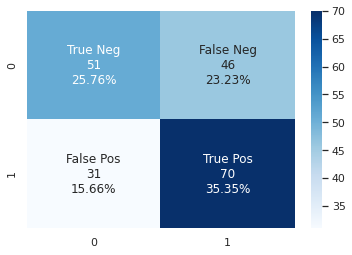

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
sns.set(font_scale=1.25)
sns.set(style="white")
from sklearn.metrics import confusion_matrix
import numpy as np

### CONFUSION MATRIX OF TRAINING SET

cf_matrix = confusion_matrix(y_train, y_pred_train_mlp) # change _mlp, _lr, _svm

group_names = ["True Neg", "False Neg", "False Pos", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = [
    "{0:.2%}".format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

fig = plt.figure()
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues")
plt.show()

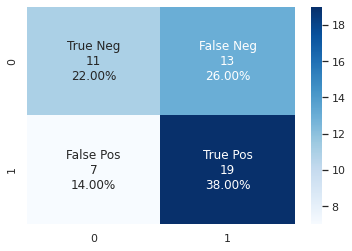

In [56]:
#import matplotlib.pyplot as plt
#%matplotlib inline  
#import seaborn as sns
#sns.set(font_scale=1.25)
#sns.set(style="white")
#from sklearn.metrics import confusion_matrix
#import numpy as np

### CONFUSION MATRIX OF TEST SET

cf_matrix = confusion_matrix(y_test, y_pred_test_mlp) # change _mlp, _lr, _svm

group_names = ["True Neg", "False Neg", "False Pos", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = [
    "{0:.2%}".format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

fig = plt.figure()
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues")
plt.show()

# **Hyper-Parameter Tuning**

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## MLP 

In [195]:
# GridSearchCV for MLP Classifier 

#from sklearn.metrics import make_scorer 

from sklearn.metrics import accuracy_score

#scorer = make_scorer(accuracy_score)

mlp_tune = MLPClassifier(random_state=random_seed_val)


parameter_space_mlp = {
    
  "hidden_layer_sizes": [(50, 100, 50), (50, 150, 50)],         # (200, 200, 200), (100,), (50, 100, 50)
  "activation": ["relu","logistic"],                                           # "relu", "logistic", "tanh"
  "solver": ["lbfgs","adam"],                                              # "lbfgs", "sgd", "adam"
  "alpha": [0.01, 0.05, 0.03],                                       # 0.001, 0.0005
  "learning_rate": ["constant", "adaptive"],                        # "invscaling", "constant", "adaptive"
  "max_iter": [100, 200]                                                # 100, 200, 500, 1000, 5000, 10000

}

GSCV_mlp = GridSearchCV(mlp_tune, parameter_space_mlp, n_jobs=-1, cv=3) # scoring = scorer
GSCV_mlp.fit(x_1_train, y_train)


# Complete MLP Parameter Space from scikit-learn
# --> Check in the LINK when which parameter is applicable and in which combination

# LINK: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

#"hidden_layer_sizes": tuple, length = n_layers - 2, default=(100,) --> e.g. (100, 100, 100), (100, 200, 100), (50, 50, 50)
#"activation": {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
#"solver": {‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
#"alpha": float, default=0.0001 --> e.g. 0.005, 0.001, 0.0005
#"batch_size": int, default=’auto’
#"learning_rate": {‘constant’, ‘invscaling’, ‘adaptive’}, default=’constant’
#"learning_rate_init": double, default=0.001
#"power_t": double, default=0.5
#"max_iter": int, default=200
#"shuffle": bool, default=True
#"random_state": int, RandomState instance, default=None
#"tol": float, default=1e-4
#"verbose": bool, default=False
#"warm_start": bool, default=False
#"momentum": float, default=0.9 --> E [0, 1] & only used when solver="sgd"
#"nesterovs_momentum": boolean, default=True
#"early_stopping": bool, default=False
#"validation_fraction": float, default=0.1
#"beta_1": float, default=0.9 --> should be in [0, 1) & only used for solver="adam"
#"beta_2": float, default=0.999 --> should be in [0, 1) & only used for solver="adam"
#"epsilon": float, default=1e-8 --> should be in [0, 1) & only used for solver="adam" 
#"n_iter_no_change": int, default=10
#"max_fun": int, default=15000


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.01, 0.05,

In [196]:
print("Best parameters found:\n", GSCV_mlp.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.03, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'lbfgs'}


In [197]:
# TRAIN SET CLASSIFICATION REPORT

from sklearn.metrics import classification_report

grid_pred_train_mlp = GSCV_mlp.predict(x_1_train)

#print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_train,grid_pred_train_mlp))

accuracy_score(y_train, grid_pred_train_mlp)

              precision    recall  f1-score   support

           0       0.86      0.74      0.80        97
           1       0.78      0.88      0.83       101

    accuracy                           0.81       198
   macro avg       0.82      0.81      0.81       198
weighted avg       0.82      0.81      0.81       198



0.8131313131313131

In [88]:
# TEST SET CLASSIFICATION REPORT

grid_pred_test_mlp = GSCV_mlp.predict(x_1_test)

#print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_pred_test_mlp))

              precision    recall  f1-score   support

           0       0.50      0.38      0.43        24
           1       0.53      0.65      0.59        26

    accuracy                           0.52        50
   macro avg       0.52      0.51      0.51        50
weighted avg       0.52      0.52      0.51        50



In [89]:
# Confusion Matrix - TEST Set

cf_matrix_test_mlp = confusion_matrix(y_test, grid_pred_test_mlp)

cf_matrix_test_mlp

array([[ 9, 15],
       [ 9, 17]])

In [90]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(
    random_state = random_seed_val, activation = 'relu', alpha = 0.01, hidden_layer_sizes = (50, 100, 50), learning_rate = 'constant', solver = 'lbfgs', max_iter = 1000
)
mlp_clf.fit(x_1_train, y_train)

y_pred_train_mlp = mlp_clf.predict(x_1_train)
y_pred_test_mlp = mlp_clf.predict(x_1_test)
model_list_mlp = mlp_clf


print("\n======\n")

print("Accuracy of Train Set: %f" % accuracy_score(y_train, y_pred_train_mlp))

print("\n======\n")

print("Accuracy of Test Set: %f" % accuracy_score(y_test, y_pred_test_mlp))

print("\n======\n")




Accuracy of Train Set: 0.813131


Accuracy of Test Set: 0.460000




/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


## Logistic Regression

In [91]:
# GridSearchCV for Logistic Regression 

lr_tune = LogisticRegression(random_state=random_seed_val)

parameter_space_lr = {
    
    "penalty":["l1", "l2"],                             # "l2", "elasticnet"
    "C":[0.0001, 0.001],
    "solver":["lbfgs", ],                    # "sag", "saga", "liblinear", 
    "max_iter":[100, 500, 1000],
    "verbose":[5, 10, 50, 100],
}

GSCV_lr = GridSearchCV(lr_tune, parameter_space_lr, n_jobs=-1, cv=3)
GSCV_lr.fit(x_1_train, y_train)




# Complete Log Reg Parameter Space from scikit-learn
# --> Check in the LINK when which parameter is applicable and in which combination

# LINK: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

#"penalty": {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’
#"dual": bool, default=False
#"tol": float, default=1e-4
#"C": float, default=1.0
#"fit_intercept": bool, default=True
#"intercept_scaling": float, default=1
#"class_weight": dict or ‘balanced’, default=None
#"random_state": int, RandomState instance, default=None
#"solver": {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
#"max_iter": int, default=100 
#"multi_class": {‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’ 
#"verbose": int, default=0
#"warm_start": bool, default=False
#"n_jobs": int, default=None
#"l1_ratio": float, default=None



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=100, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001], 'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2'], 'solver': ['lbfgs'],
                         'verbose': [5, 10, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [92]:
print("Best parameters found:\n", GSCV_lr.best_params_)

Best parameters found:
 {'C': 0.0001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs', 'verbose': 5}


In [93]:
# TRAIN SET CLASSIFICATION REPORT

grid_pred_train_lr = GSCV_lr.predict(x_1_train)

#print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_train,grid_pred_train_lr))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        97
           1       0.51      1.00      0.68       101

    accuracy                           0.51       198
   macro avg       0.26      0.50      0.34       198
weighted avg       0.26      0.51      0.34       198



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
# TEST SET CLASSIFICATION REPORT

grid_pred_test_lr = GSCV_lr.predict(x_1_test)

#print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_pred_test_lr))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.52      1.00      0.68        26

    accuracy                           0.52        50
   macro avg       0.26      0.50      0.34        50
weighted avg       0.27      0.52      0.36        50



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
# Confusion Matrix - TEST Set

cf_matrix_test_lr = confusion_matrix(y_test, grid_pred_test_lr)

cf_matrix_test_lr

array([[ 0, 24],
       [ 0, 26]])

In [96]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=random_seed_val, C = 0.0001, max_iter = 1000, penalty = "l2", solver = "lbfgs").fit(x_1_train, y_train)

y_pred_train_lr = lr_clf.predict(x_1_train)
y_pred_test_lr = lr_clf.predict(x_1_test)


print("\n======\n")

print("Accuracy of Train Set: %f" % accuracy_score(y_train, y_pred_train_lr))

print("\n======\n")

print("Accuracy of Test Set: %f" % accuracy_score(y_test, y_pred_test_lr))

print("\n======\n")




Accuracy of Train Set: 0.510101


Accuracy of Test Set: 0.520000




## SVM

In [177]:
# GridSearchCV for Support Vector Machines Classifier    ### WATCH OUT! --> "poly" is the one which let's it run for an eternity, make one at a time


svm_tune = svm.SVC(random_state=random_seed_val)

parameter_space_svm = {
    
    'C': [1, 2, 3, 10],                                             # 0.125, 0.25, 0.5, 1, 2, 5, 10
    'gamma': [0.1,0.2,0.3], 
    'kernel': ["rbf", "linear"],                                   # "poly","sigmoid", "rbf", "linear"
    "cache_size": [100, 200, 300],
    "class_weight": ["balanced","None"]                  # "dict", "balanced", "None"
}

GSCV_svm = GridSearchCV(svm_tune, parameter_space_svm, n_jobs=-1, cv=3)   #   verbose=2, refit=True
GSCV_svm.fit(x_1_train, y_train)



#grid = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=2)
#grid.fit(x_1_train,y_train)

# https://scikit-learn.org/stable/modules/svm.html
# Check there is some option with underrepresentated class 


# Complete SVM Parameter Space from scikit-learn
# --> Check in the LINK when which parameter is applicable and in which combination

# LINK: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html


#"C": float, default=1.0
#"kernel": {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
#"degree": int, default=3
#"gamma": {‘scale’, ‘auto’} or float, default=’scale’
#"coef0": float, default=0.0
#"shrinking": bool, default=True
#"probability": bool, default=False
#"tol": float, default=1e-3
#"cache_size": float, default=200
#"class_weight": dict or ‘balanced’, default=None
#"verbose": bool, default=False
#"max_iter": int, default=-1
#"decision_function_shape": {‘ovo’, ‘ovr’}, default=’ovr’
#"break_ties": bool, default=False
#"random_state": int or RandomState instance, default=None


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=100, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 2, 3, 10], 'cache_size': [100, 200, 300],
                         'class_weight': ['balanced', 'None'],
                         'gamma': [0.1, 0.2, 0.3],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [178]:
print("Best parameters found:\n", GSCV_svm.best_params_)

Best parameters found:
 {'C': 10, 'cache_size': 100, 'class_weight': 'balanced', 'gamma': 0.2, 'kernel': 'rbf'}


In [179]:
# TRAIN SET CLASSIFICATION REPORT

grid_pred_train_svm = GSCV_svm.predict(x_1_train)

#print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_train,grid_pred_train_svm))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73        97
           1       0.74      0.72      0.73       101

    accuracy                           0.73       198
   macro avg       0.73      0.73      0.73       198
weighted avg       0.73      0.73      0.73       198



In [133]:
# TEST SET CLASSIFICATION REPORT

grid_pred_test_svm = GSCV_svm.predict(x_1_test)

#print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_pred_test_svm))

              precision    recall  f1-score   support

           0       0.44      0.50      0.47        24
           1       0.48      0.42      0.45        26

    accuracy                           0.46        50
   macro avg       0.46      0.46      0.46        50
weighted avg       0.46      0.46      0.46        50



In [101]:
# Confusion Matrix - TEST Set

cf_matrix_test_svm = confusion_matrix(y_test, grid_pred_test_svm)

cf_matrix_test_svm

array([[ 0, 24],
       [ 0, 26]])

In [102]:
from sklearn import svm

svm_clf = svm.SVC(random_state=random_seed_val, C = 1, kernel = "rbf", gamma = 0.1, class_weight = "balanced", cache_size = 100).fit(x_1_train, y_train)


y_pred_train_svm = svm_clf.predict(x_1_train)
y_pred_test_svm = svm_clf.predict(x_1_test)


print("\n======\n")

print("Accuracy of Train Set: %f" % accuracy_score(y_train, y_pred_train_svm))

print("\n======\n")

print("Accuracy of Test Set: %f" % accuracy_score(y_test, y_pred_test_svm))

print("\n======\n")



Accuracy of Train Set: 0.611111


Accuracy of Test Set: 0.460000




# **Trading Strategy**

In [112]:
z = len(y)
n = len(y_train)
m = len(y_test)
print(z)
print(n)
print(m)


248
198
50


In [113]:
# Create Data Frames to extract the relevant rows of the Date column

merged3sentiment_train = merged3sentiment.head(int(len(merged3sentiment)*(n/z)))

print(merged3sentiment_train.shape)
merged3sentiment_train


merged3sentiment_test = merged3sentiment.tail(int(len(merged3sentiment)*(m/z)))

print(merged3sentiment_test.shape)
merged3sentiment_test

(198, 5)
(50, 5)


,date,Negative_VADER,Neutral_VADER,Positive_VADER,Return
199,2020-09-04,1.0,4.0,2.0,0
200,2020-09-08,0.0,3.0,7.0,0
201,2020-09-09,1.0,2.0,1.0,0
202,2020-09-10,6.0,6.0,7.0,0
203,2020-09-11,3.0,5.0,2.0,1
204,2020-09-14,1.0,0.0,3.0,0
205,2020-09-15,1.0,2.0,1.0,1
206,2020-09-16,1.0,3.0,1.0,0
207,2020-09-17,0.0,0.0,4.0,0
208,2020-09-18,0.0,0.0,2.0,0


In [114]:
##Obtain prediction for highest accruacy model on training set
#pred_df = pd.DataFrame(grid_pred_test_mlp , columns=["Predicted"])

Date = merged3sentiment_test["date"].to_numpy()

pred = pd.DataFrame([Date, y_test, grid_pred_test_mlp])  # --> change here to     _svm, _mlp, _lr
pred = pred.T
pred.columns = ["Date", "Ground Truth", "Predicted"]

print(pred.shape)
pred


(50, 3)


,Date,Ground Truth,Predicted
0,2020-09-04,0,1
1,2020-09-08,0,0
2,2020-09-09,0,1
3,2020-09-10,0,0
4,2020-09-11,1,1
5,2020-09-14,0,1
6,2020-09-15,1,1
7,2020-09-16,0,1
8,2020-09-17,0,1
9,2020-09-18,0,0


In [115]:
#Merge the Pred Data Frame with histdata which contains the level of returns

histdata = histdata[["returns"]]
print(histdata.shape)
print("\n=======\n")
histdata

mergedtrading = pred.merge(histdata, left_on="Date", right_on="Date")  ### mergedtrading = pred.merge(histdata, left_on="date", right_on="Date") 
print(mergedtrading.shape)
mergedtrading

(252, 1)


(50, 4)


,Date,Ground Truth,Predicted,returns
0,2020-09-04,0,1,-0.018450
1,2020-09-08,0,0,-0.017498
2,2020-09-09,0,1,-0.013471
3,2020-09-10,0,0,-0.039025
4,2020-09-11,1,1,0.002829
5,2020-09-14,0,1,-0.011970
6,2020-09-15,1,1,0.041427
7,2020-09-16,0,1,-0.024456
8,2020-09-17,0,1,-0.028231
9,2020-09-18,0,0,-0.000510


In [116]:
##Buy and hold returns
mergedtrading["buyandhold"] = (mergedtrading["returns"] + 1).cumprod()  # --> Cumulated Product

mergedtrading

,Date,Ground Truth,Predicted,returns,buyandhold
0,2020-09-04,0,1,-0.018450,0.981550
1,2020-09-08,0,0,-0.017498,0.964375
2,2020-09-09,0,1,-0.013471,0.951384
3,2020-09-10,0,0,-0.039025,0.914256
4,2020-09-11,1,1,0.002829,0.916843
5,2020-09-14,0,1,-0.011970,0.905868
6,2020-09-15,1,1,0.041427,0.943395
7,2020-09-16,0,1,-0.024456,0.920323
8,2020-09-17,0,1,-0.028231,0.894341
9,2020-09-18,0,0,-0.000510,0.893885


In [117]:
#Buy when it predicted up, short-sell when it predicted down 

import numpy as np

mergedtrading["help_column"] = np.where(mergedtrading["Predicted"]==1, 1, -1)
mergedtrading["help_column_2"] = mergedtrading["returns"]*mergedtrading["help_column"]
mergedtrading["strategy"] = (mergedtrading["help_column_2"] + 1).cumprod()

mergedtrading

,Date,Ground Truth,Predicted,returns,buyandhold,help_column,help_column_2,strategy
0,2020-09-04,0,1,-0.018450,0.981550,1,-0.018450,0.981550
1,2020-09-08,0,0,-0.017498,0.964375,-1,0.017498,0.998726
2,2020-09-09,0,1,-0.013471,0.951384,1,-0.013471,0.985272
3,2020-09-10,0,0,-0.039025,0.914256,-1,0.039025,1.023722
4,2020-09-11,1,1,0.002829,0.916843,1,0.002829,1.026619
5,2020-09-14,0,1,-0.011970,0.905868,1,-0.011970,1.014330
6,2020-09-15,1,1,0.041427,0.943395,1,0.041427,1.056351
7,2020-09-16,0,1,-0.024456,0.920323,1,-0.024456,1.030516
8,2020-09-17,0,1,-0.028231,0.894341,1,-0.028231,1.001423
9,2020-09-18,0,0,-0.000510,0.893885,-1,0.000510,1.001935


In [118]:
mergedtrading.drop(columns=["help_column", "help_column_2","returns", "Predicted"]).tail(2)

,Date,Ground Truth,buyandhold,strategy
48,2020-11-12,0,0.925858,0.990474
49,2020-11-13,0,0.918383,0.982478


In [119]:
##Adjustements for plot(making it able to start from 1)
#Resetting index
mergedtrading=mergedtrading.set_index("Date")

# Creating a new data fram with value of 1 for the two strategys. Then adding it to exising dataframe
helpdf=pd.DataFrame(data={'date': ["2020-09-02"], 'buyandhold': [1], 'strategy': [1]})
helpdf['date'] = pd.to_datetime(helpdf['date'])
helpdf=helpdf.set_index("date")

mergedtrading=pd.concat([helpdf,mergedtrading])

#Takning minus 1
mergedtrading["buyandhold"]= mergedtrading["buyandhold"]-1
mergedtrading["strategy"]= mergedtrading["strategy"]-1

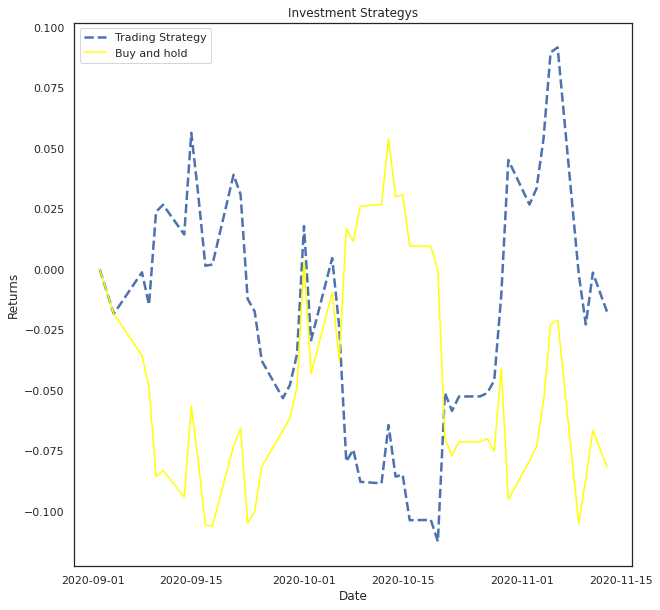

In [120]:
##Plotting result
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(mergedtrading.index.values,
        mergedtrading['strategy'],
        "b--",
        linewidth=2.5,
        label="Trading Strategy"
        )

ax.plot(mergedtrading.index.values,
        mergedtrading['buyandhold'],
        color="yellow",
        label='Buy and hold'
        )

ax.set(xlabel="Date",
       ylabel="Returns",
       title="Investment Strategys"
       )

plt.legend()